# Homework Questions 9.3,10.4,11.3

# 9.3

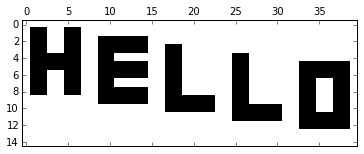

[  1.03832691e+01   5.13177886e+00   3.18775603e+00   2.93826395e+00
   2.06251517e+00   1.83760006e+00   1.22698575e+00   9.87917873e-01
   7.37985369e-01   6.32884999e-01   4.28460099e-16   8.14726354e-17
   0.00000000e+00   0.00000000e+00   0.00000000e+00]


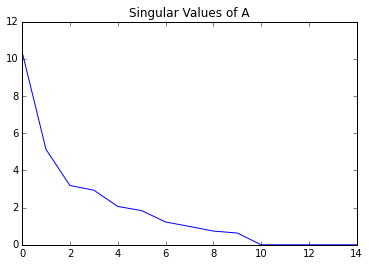

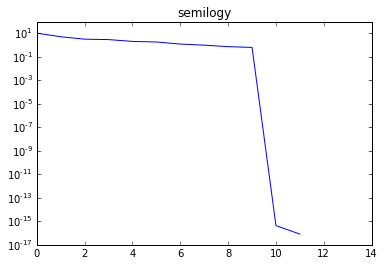

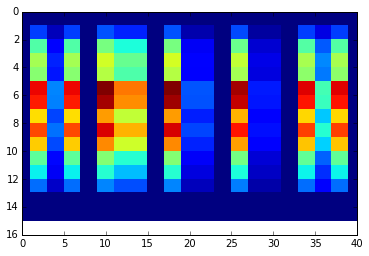

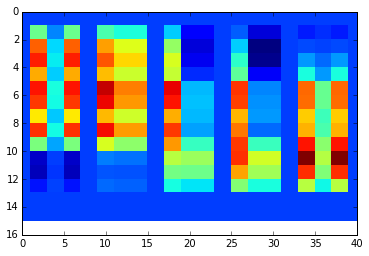

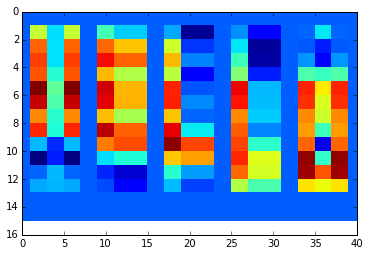

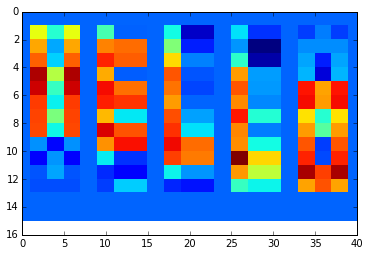

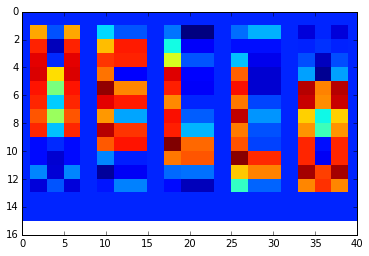

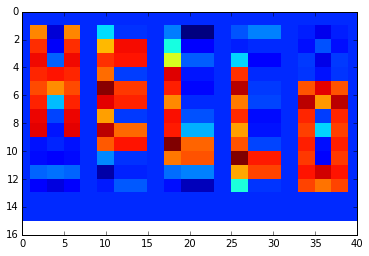

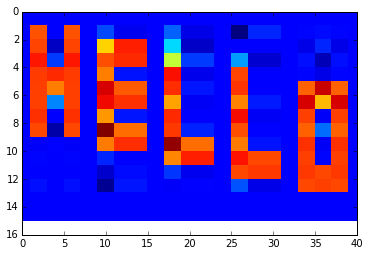

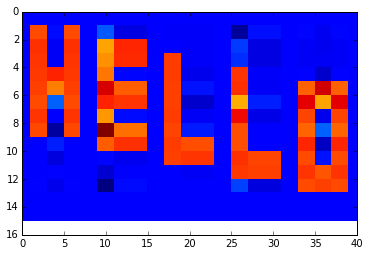

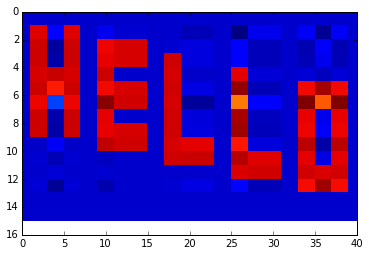

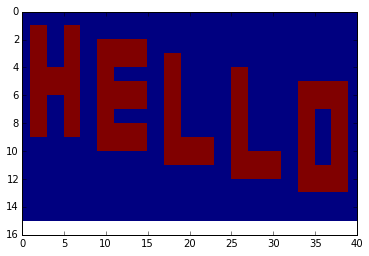

In [123]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = figure()

A = np.zeros((15,40))
#5 boxes for 5 letters
A[1:9][:,1:7] = 1.0
A[2:10][:,9:15] = 1.0
A[3:11][:,17:23] = 1.0
A[4:12][:,25:31] = 1.0
A[5:13][:,33:39] = 1.0
#H
A[1:4][:,3:5] = 0
A[6:9][:,3:5] = 0
#E
A[4:5][:,11:15] = 0
A[7:8][:,11:15] = 0
#L
A[3:9][:,19:23] = 0
#L
A[4:10][:,27:31] = 0
#O
A[7:11][:,35:37] = 0

plt.spy(A)
plt.show()

#Singular Value Decomposition
#U is 15by15 matrix
#V is 40by40 matrix
#s is vector that contains 15 singular values of A
U, s, V = np.linalg.svd(A, full_matrices=True)
print s

plt.plot(s)
plt.title('Singular Values of A')
plt.show()

plt.semilogy(s)
plt.title('semilogy')
plt.show()

S = np.zeros((15,40))
for i in range(10):
    S[i,i] = s[i]
    B = np.dot(U,np.dot(S,V))
    plt.pcolor(B)
    ax = plt.gca()
    ax.invert_yaxis()
    plt.show()

As it can be seen, A has 10 singular values which are greater than 0. Therefore rank(A)=10

# 10.4

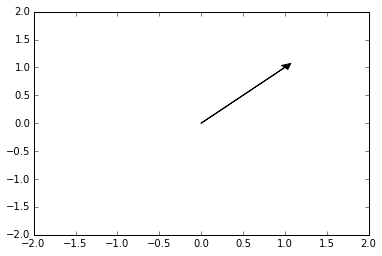

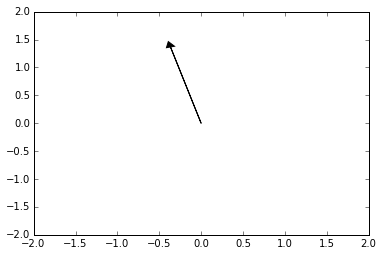

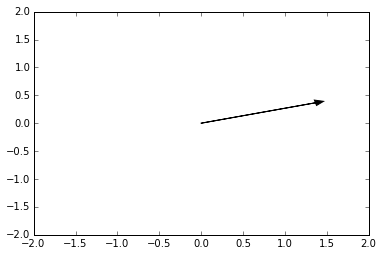

In [88]:
import numpy as np
import matplotlib.pyplot as plt

v = np.array([[1.0,1.0]]).transpose()

plt.arrow( 0, 0, v[0][0], v[1][0], fc="k", ec="k",
head_width=0.1, head_length=0.1 )
ax = plt.gca()
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
plt.show()

teta = (np.pi)/6
F = np.array([[-1*np.cos(teta),np.sin(teta)], [np.sin(teta),np.cos(teta)]])
J = np.array([[np.cos(teta),np.sin(teta)], [-1*np.sin(teta),np.cos(teta)]])

Fv = np.dot(F,v)
plt.arrow( 0, 0, Fv[0][0], Fv[1][0], fc="k", ec="k",
head_width=0.1, head_length=0.1 )
ax = plt.gca()
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
plt.show()

Jv = np.dot(J,v)
plt.arrow( 0, 0, Jv[0][0], Jv[1][0], fc="k", ec="k",
head_width=0.1, head_length=0.1 )
ax = plt.gca()
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
plt.show()

I drawed a vector and multiplied it with F and J from the left to show the effects of reflector F and rotation matrix J. <br />
J rotates the vector with the angle of teta and rotation is clockwise. <br />
F, on the other hand, is 90 degree counterclockwise rotated version of J.

In [1]:
import numpy as np
import math
# A is a random matrix
m = 6
n = 4
A = np.random.randint(10, size=(m, n))

Q = np.identity((m))
R = np.zeros((m,n))

for i in range(n-1):
    for j in range(i+1,m,1):
        c = 1.0*A[i][i]/math.sqrt((A[i][i])**2 + (A[j][i])**2)
        s = -1.0*A[j][i]/math.sqrt((A[i][i])**2 + (A[j][i])**2)
        G = np.identity((m))
        G[i][i] = c
        G[j][j] = c
        G[j][i] = s
        G[i][j] = -s
        A = np.dot(G,A)
        Q = np.dot(Q,G.transpose())
R = A

print R
print Q

[[  1.55884573e+01   6.22255290e+00   1.05206049e+01   6.86405320e+00]
 [ -7.20635474e-17   7.89175743e+00   5.76994159e+00   1.05021802e+00]
 [ -2.73322164e-16   1.74635313e-16   9.16649587e+00   6.29753315e+00]
 [ -3.41444156e-16   0.00000000e+00   4.44089210e-16  -6.21991627e-01]
 [  1.11213372e-16  -6.38334938e-18   0.00000000e+00  -7.70669446e-01]
 [  2.62772095e-17   4.08319893e-16   0.00000000e+00  -1.46358703e+00]]
[[ 0.38490018 -0.17677453 -0.00320777 -0.86866957 -0.23361575  0.10690735]
 [ 0.32075015 -0.12619303  0.69313737  0.27694518 -0.52066693 -0.23013599]
 [ 0.57735027 -0.32851904 -0.45584905  0.410121   -0.13298595  0.40627461]
 [ 0.38490018  0.71022688 -0.34335371  0.02270042 -0.18494693 -0.44138099]
 [ 0.51320024 -0.02450856  0.2991586   0.          0.78894803 -0.15520947]
 [ 0.06415003  0.58299094  0.32305466  0.          0.          0.74272608]]


# 11.3

In [60]:
import numpy as np

m=50
n=12

t = np.linspace(0.0, 1.0, num=50)
b = np.cos(4*t)

A = np.fliplr(np.vander(t,12))

def modifiedGS(A,m,n):
    v = np.zeros((m,n))
    q = np.zeros((m,n))
    r = np.zeros((n,n))
    for i in range(n):
        v[:,i] = A[:,i]
    for i in range(n):
        r[i,i] = np.linalg.norm(v[:,i])
        q[:,i] = v[:,i]/r[i,i]
        for j in range(i+1,n,1):
            r[i,j] = np.inner(q[:,i],v[:,j])
            v[:,j] = v[:,j] - r[i,j]*q[:,i]
    return q,r

def houseHolder(A,m,n):
    vdict = {}
    R = np.ones((m,n))
    R[0:m,0:n] = A[0:m,0:n]
    for k in range(n):
        x = R[k:m,k]
        e1 = np.zeros((m-k))
        e1[0] = 1
        #vec = np.array([np.sign(x[0])*np.linalg.norm(x)]*e1 + x)
        vec = np.sign(x[0])*np.linalg.norm(x)*e1 + x
        vector = vec/np.linalg.norm(vec)
        vdict[k] = vector
        R[k:m,k:n] = R[k:m,k:n] - 2*np.outer(vector,np.dot(vector.transpose(),R[k:m,k:n]))
    R = R[0:n,0:n]
    return R,vdict

def Qb(b,vdict,m,n):
    d = np.ones((m))
    d[0:m] = b[0:m]
    for k in range(n):
        d[k:m] = d[k:m] - 2*vdict[k]*np.inner(vdict[k],d[k:m])
    d = d[0:n]
    return d

# x values for all parts
xa = np.linalg.solve(np.dot(A.transpose(),A),np.dot(A.transpose(),b))
print xa

q,r = modifiedGS(A,m,n)
xb = np.linalg.solve(r,(np.dot(q.transpose(),b)))
print xb

r,vectordict = houseHolder(A,m,n)
qTb = Qb(b,vectordict,m,n)
xc = np.linalg.solve(r,qTb)
print xc

q, r = np.linalg.qr(A)
xd = np.linalg.solve(r,(np.dot(q.transpose(),b)))
print xd

xe = np.linalg.lstsq(A,b)[0]
print xe

U, s, V = np.linalg.svd(A, full_matrices=False)
S = np.diag(s)
xf = np.dot(V.transpose(),np.linalg.solve(S,np.dot(U.transpose(),b)))
print xf

#residuals

ra = np.linalg.norm(np.dot(A,xa)-b)
print ra

rb = np.linalg.norm(np.dot(A,xb)-b)
print rb

rc = np.linalg.norm(np.dot(A,xc)-b)
print rc

rd = np.linalg.norm(np.dot(A,xd)-b)
print rd

re = np.linalg.norm(np.dot(A,xe)-b)
print re

rf = np.linalg.norm(np.dot(A,xf)-b)
print rf

[  9.99999978e-01   6.44901198e-06  -8.00024128e+00   3.53416506e-03
   1.06398046e+01   1.20358790e-01  -6.02865424e+00   6.25279456e-01
   8.63989859e-01   6.17895568e-01  -6.29854016e-01   1.34237078e-01]
[  1.00000000e+00  -6.89862115e-07  -7.99997137e+00  -4.62419762e-04
   1.06705196e+01  -1.86921821e-02  -5.63336241e+00  -1.00272244e-01
   1.72293194e+00  -1.54494289e-02  -3.65321455e-01   8.64370783e-02]
[  1.00000000e+00  -4.22743170e-07  -7.99998124e+00  -3.18763353e-04
   1.06694308e+01  -1.38202919e-02  -5.64707562e+00  -7.53160429e-02
   1.69360698e+00   6.03209363e-03  -3.74241697e-01   8.80405750e-02]
[  1.00000000e+00  -4.22743308e-07  -7.99998124e+00  -3.18763306e-04
   1.06694308e+01  -1.38202898e-02  -5.64707562e+00  -7.53160312e-02
   1.69360697e+00   6.03210404e-03  -3.74241702e-01   8.80405758e-02]
[  1.00000000e+00  -4.22743248e-07  -7.99998124e+00  -3.18763282e-04
   1.06694308e+01  -1.38202891e-02  -5.64707562e+00  -7.53160281e-02
   1.69360697e+00   6.03210639